In [ ]:
from hestonpy.models.heston import Heston
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Parameters for the Heston model
S0 = 100.0  # Initial spot price
V0 = 0.06  # Initial volatility
r = 0.03  # Risk-free interest rate
kappa = 1.0  # Mean reversion rate
theta = 0.06  # Long-term volatility
drift_emm = 0.01  # Drift term
sigma = 0.3  # Volatility of volatility
rho = -0.5  # Correlation between asset and volatility

heston = Heston(S0, V0, r, kappa, theta, drift_emm, sigma, rho)

strike = 100
strike_hedging = 110
maturity = 1
maturity_hedging = 1.2
nbr_points = 252 
nbr_simulations = 10

portfolio, S, V, C = heston.delta_vega_hedging(
    strike,
    strike_hedging,
    maturity,
    maturity_hedging,
    nbr_points, 
    nbr_simulations
)

Computing option prices ...
Computing vegas ...
Computing deltas ...


100%|██████████| 251/251 [00:00<00:00, 42517.28it/s]


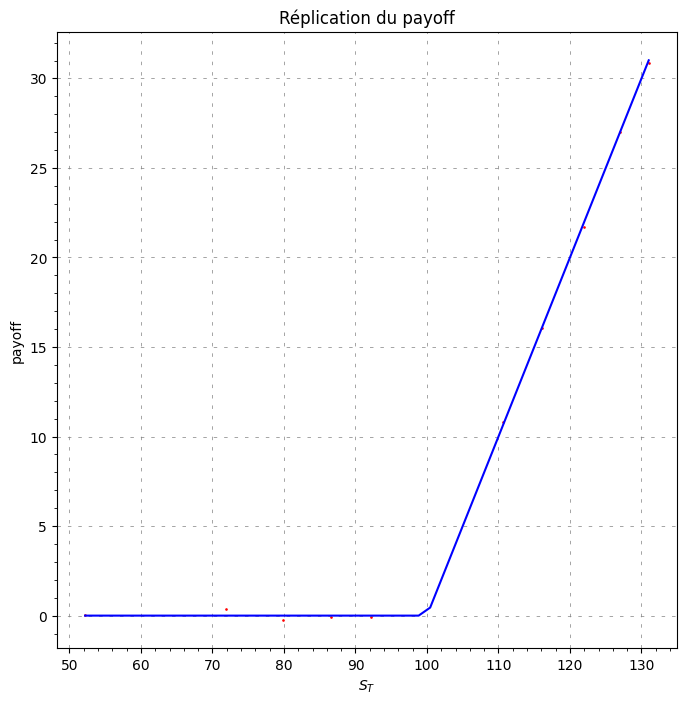

In [3]:
ST = S[:, -1]
VT = portfolio[:, -1]

plt.figure(figsize=(8, 8))
plt.title("Réplication du payoff")
plt.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
plt.minorticks_on()
plt.xlabel(r"$S_T$")
plt.ylabel("payoff")
plt.scatter(ST, VT, s=0.8, color="red")
x = np.linspace(min(ST), max(ST))
payoff = np.maximum(0, x - strike)
plt.plot(x, payoff, color="blue")
plt.show()

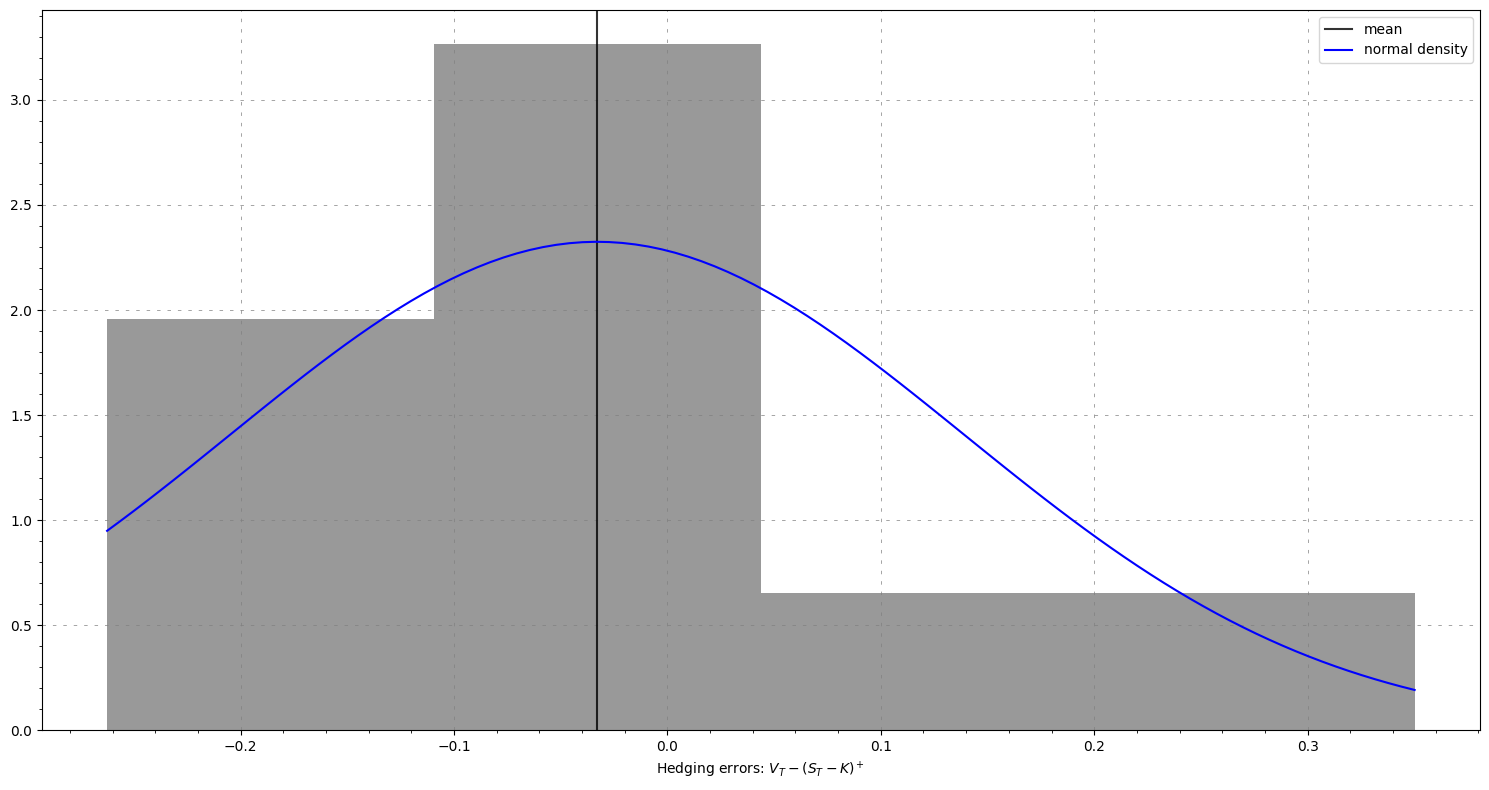

In [4]:
ST = S[:, -1]
VT = portfolio[:, -1]

from scipy.stats import norm

cash_flows = np.maximum(0, ST - strike)
hedging_errors = VT - cash_flows
hedging_errors = hedging_errors[np.abs(hedging_errors) < 5]

plt.figure(figsize=(15, 8))
plt.hist(hedging_errors, bins="fd", density=True, color="gray", alpha=0.8)
plt.axvline(np.mean(hedging_errors), color="black", label="mean", alpha=0.8)

x = np.linspace(start=min(hedging_errors), stop=max(hedging_errors), num=100)
plt.plot(
    x,
    norm.pdf(x, loc=np.mean(hedging_errors), scale=np.std(hedging_errors)),
    label="normal density",
    color="blue",
)
plt.xlabel(r"Hedging errors: $V_T - (S_T - K)^+$")
plt.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.show()

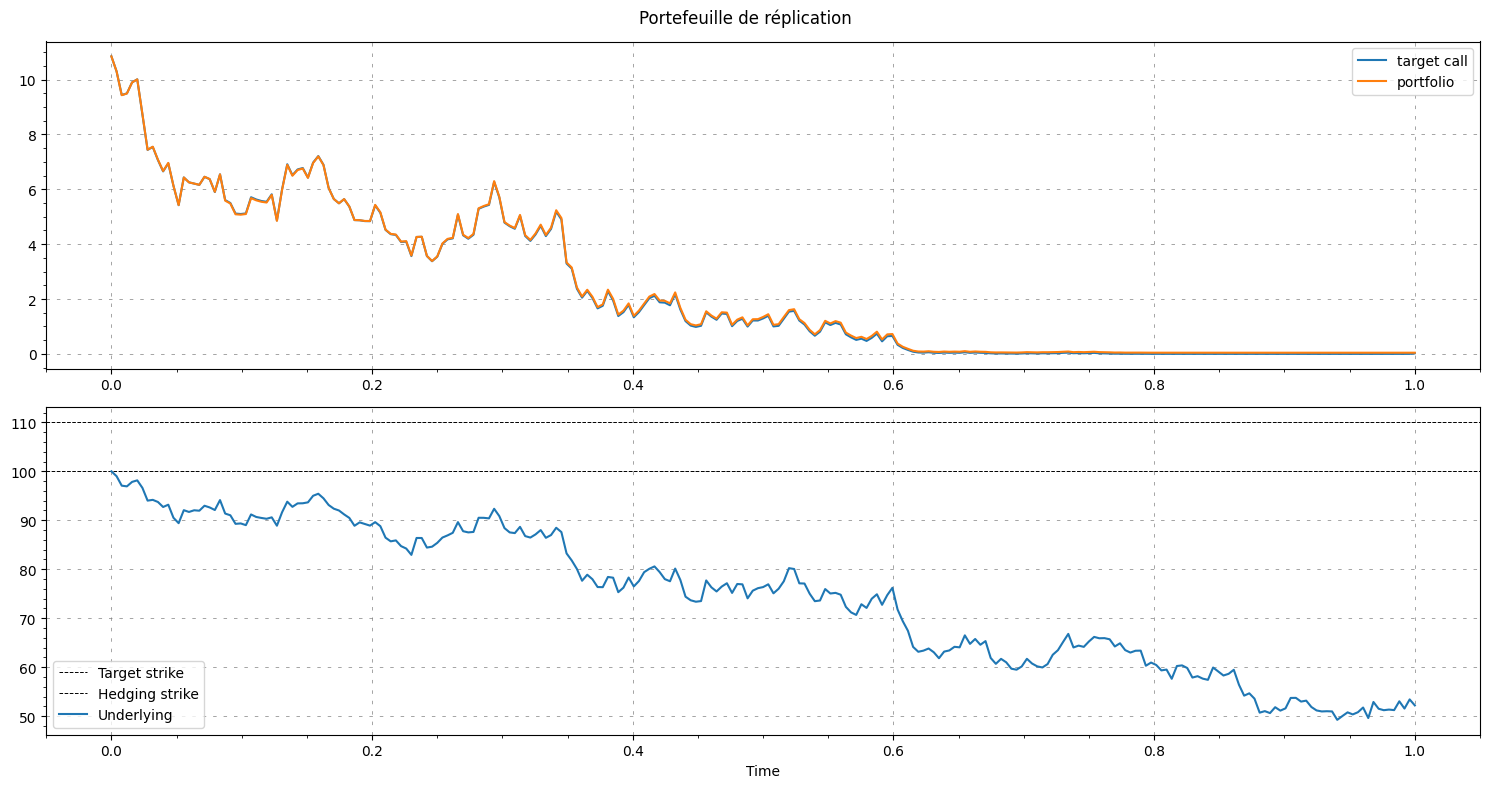

In [5]:
time = np.linspace(start=0, stop=maturity, num=nbr_points + 1)

path = -10

fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 8))

plt.suptitle("Portefeuille de réplication")

ax1.plot(time, C[path, :], label="target call")
ax1.plot(time, portfolio[path, :], label="portfolio")
ax1.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
ax1.minorticks_on()
ax1.legend()

ax2.axhline(y=strike, label="Target strike", linestyle="dashed", color='black', linewidth=0.7)
ax2.axhline(y=strike_hedging, label="Hedging strike", linestyle="dashed", color='black', linewidth=0.7)
ax2.plot(time, S[path, :], label="Underlying")
ax2.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
ax2.minorticks_on()
ax2.set_xlabel("Time")
ax2.legend()

plt.tight_layout()
plt.show()

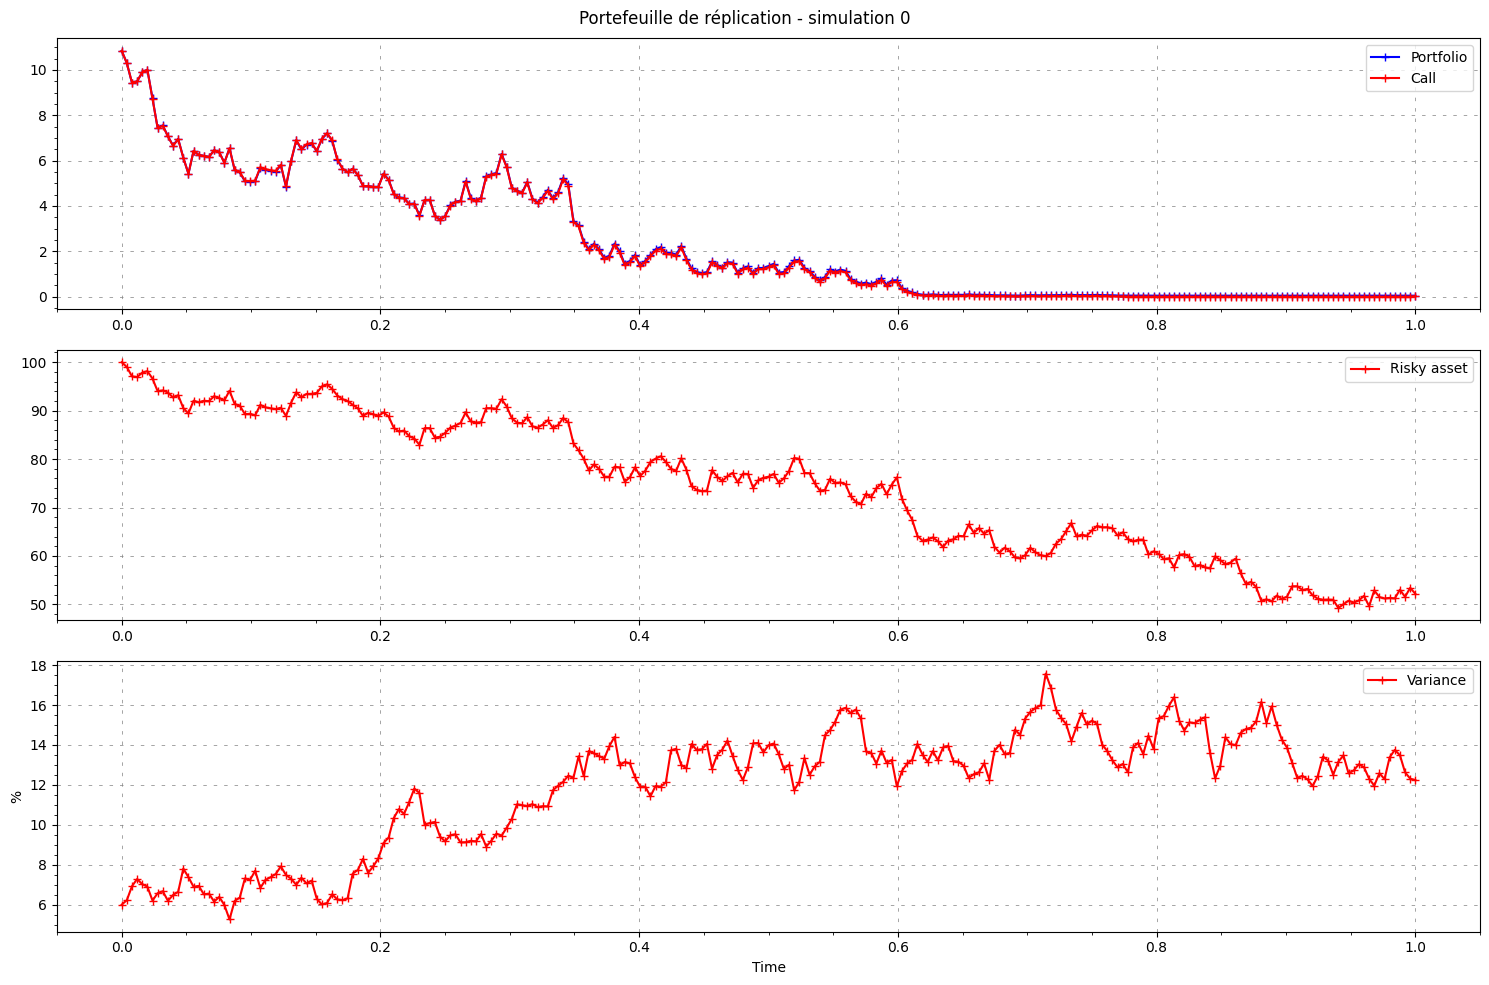

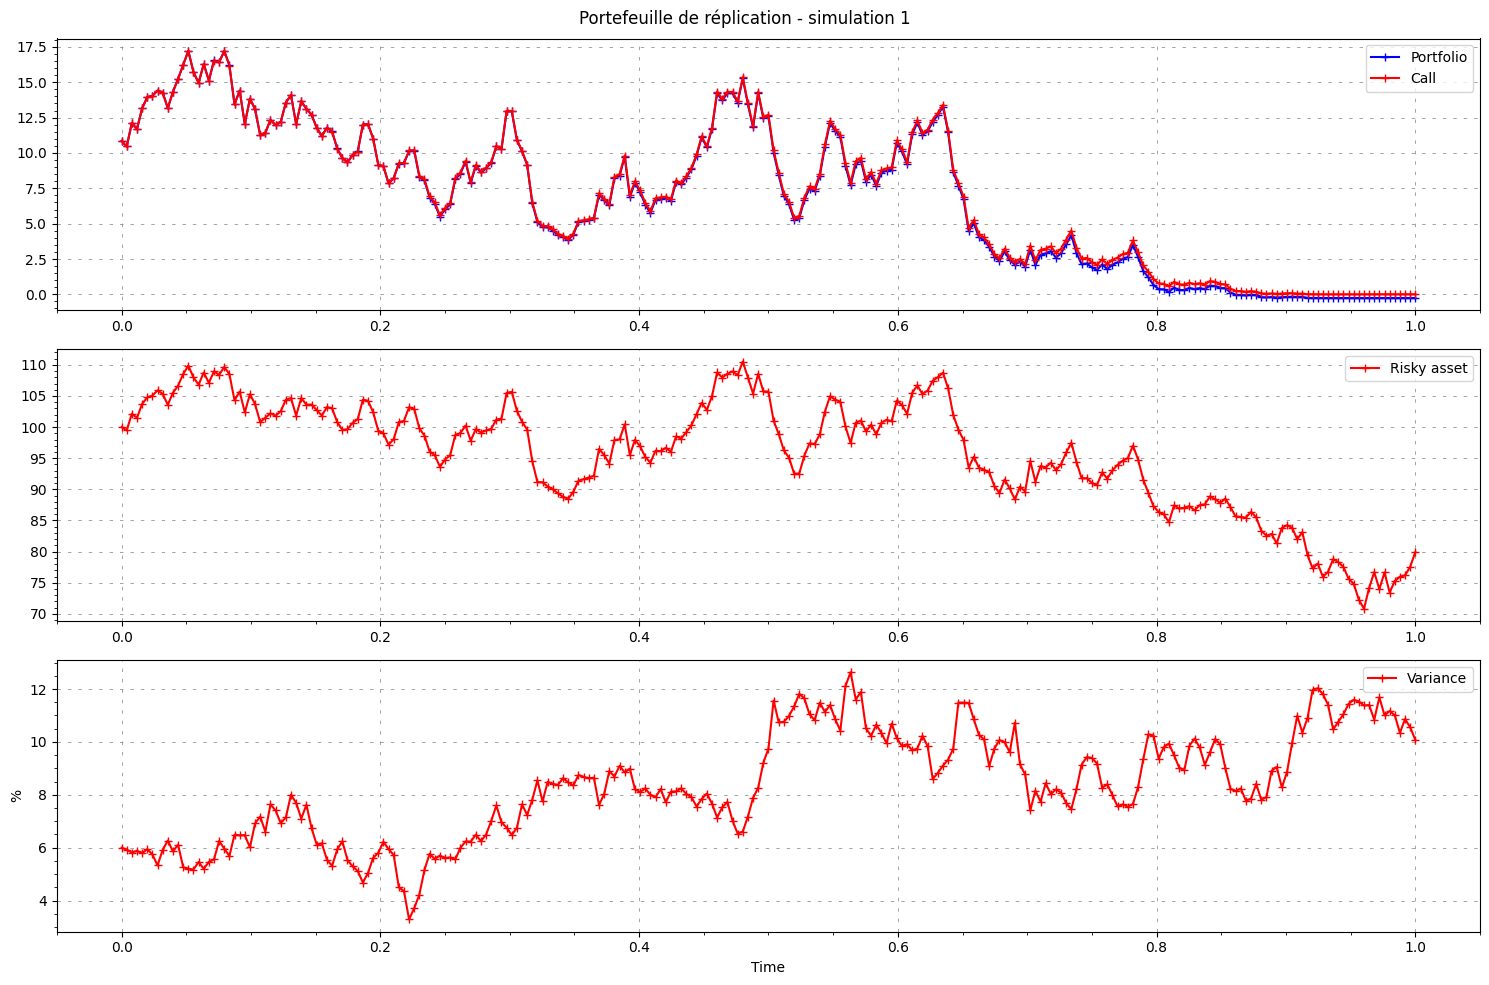

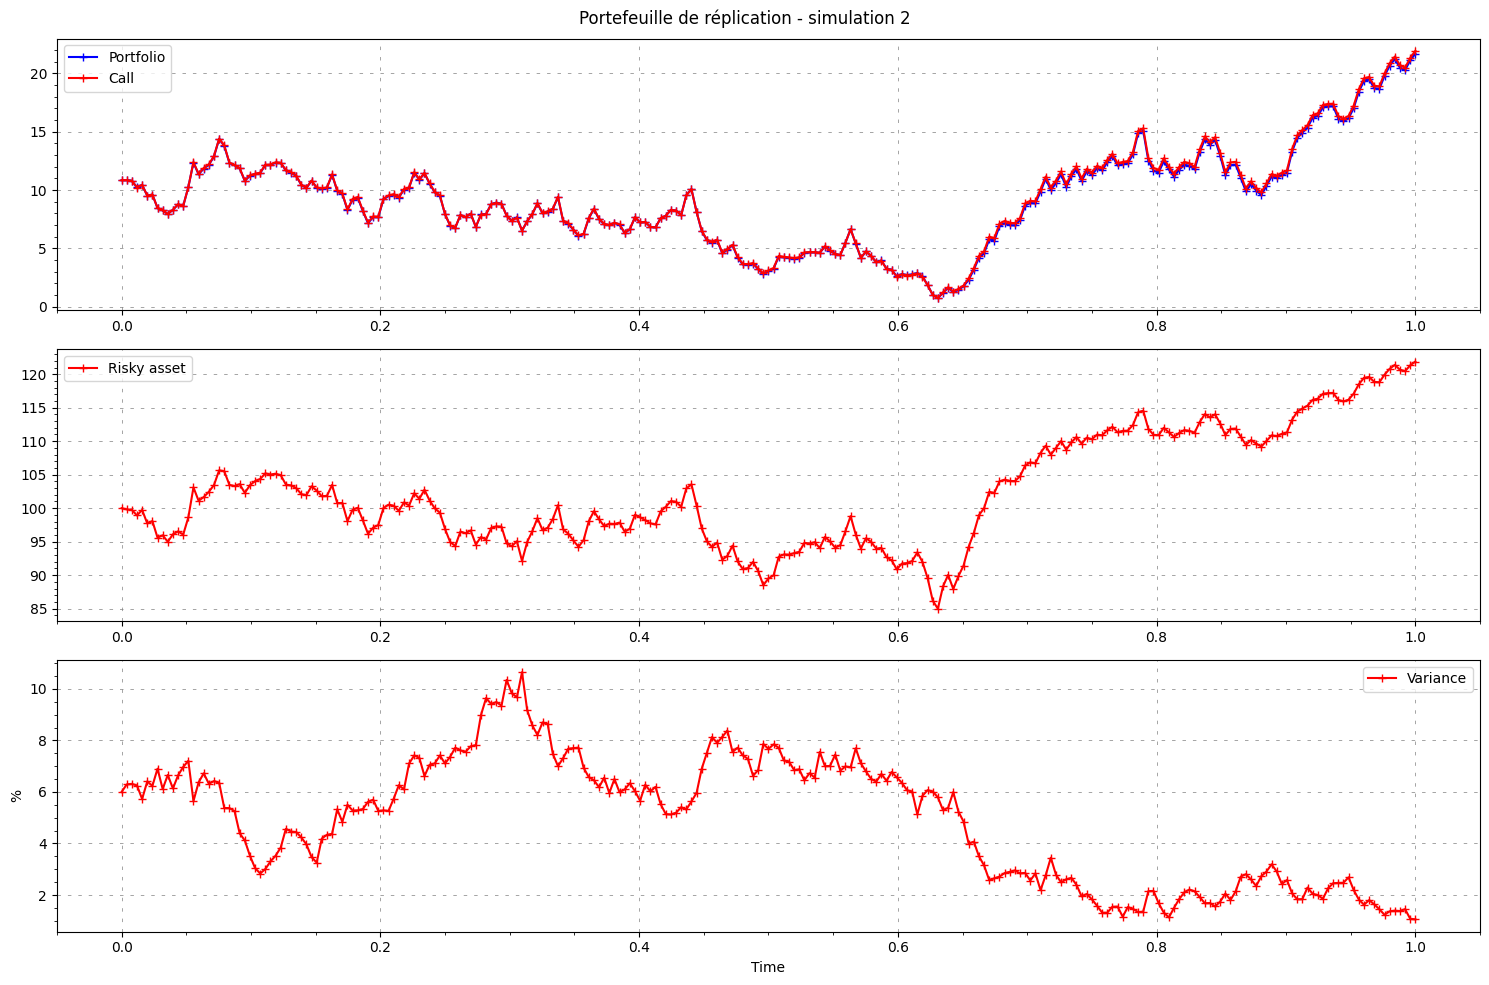

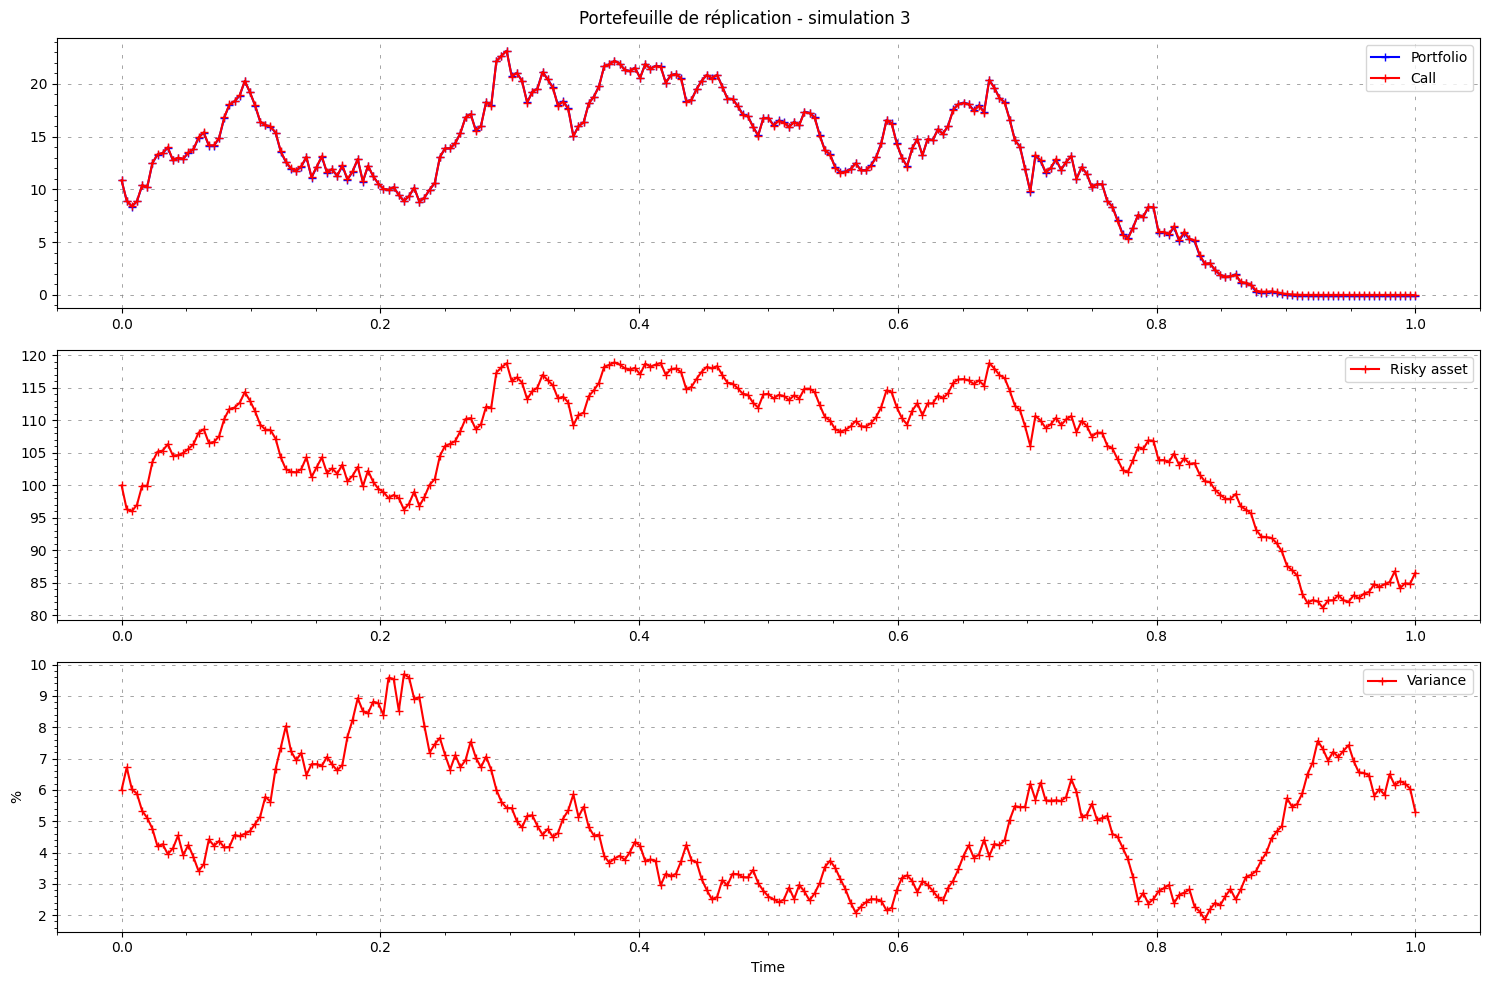

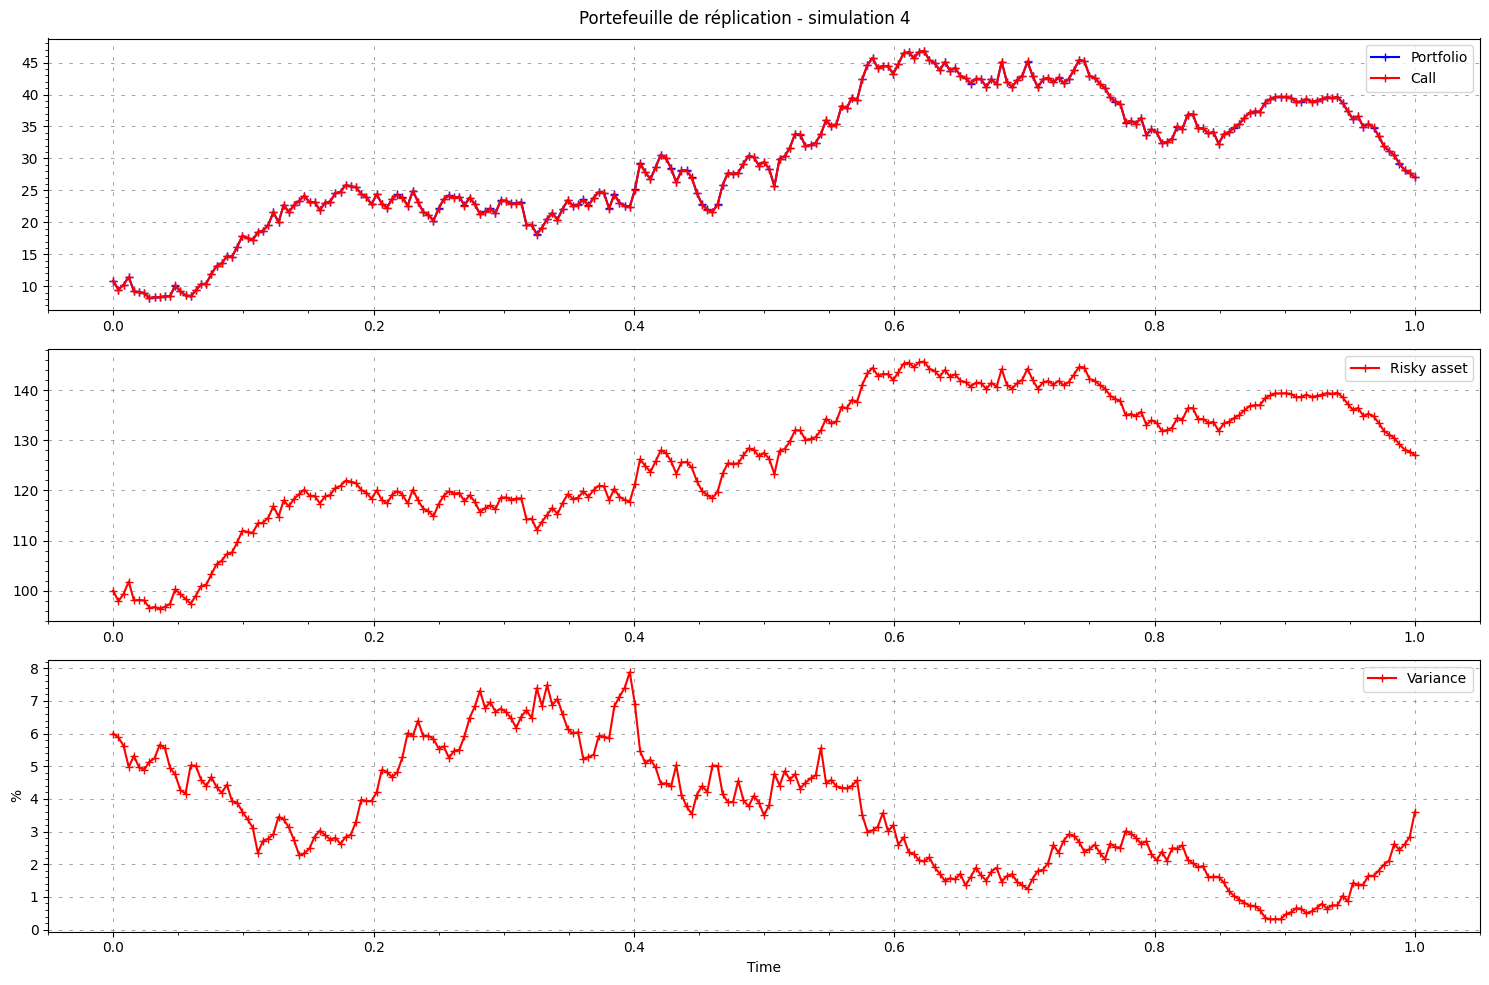

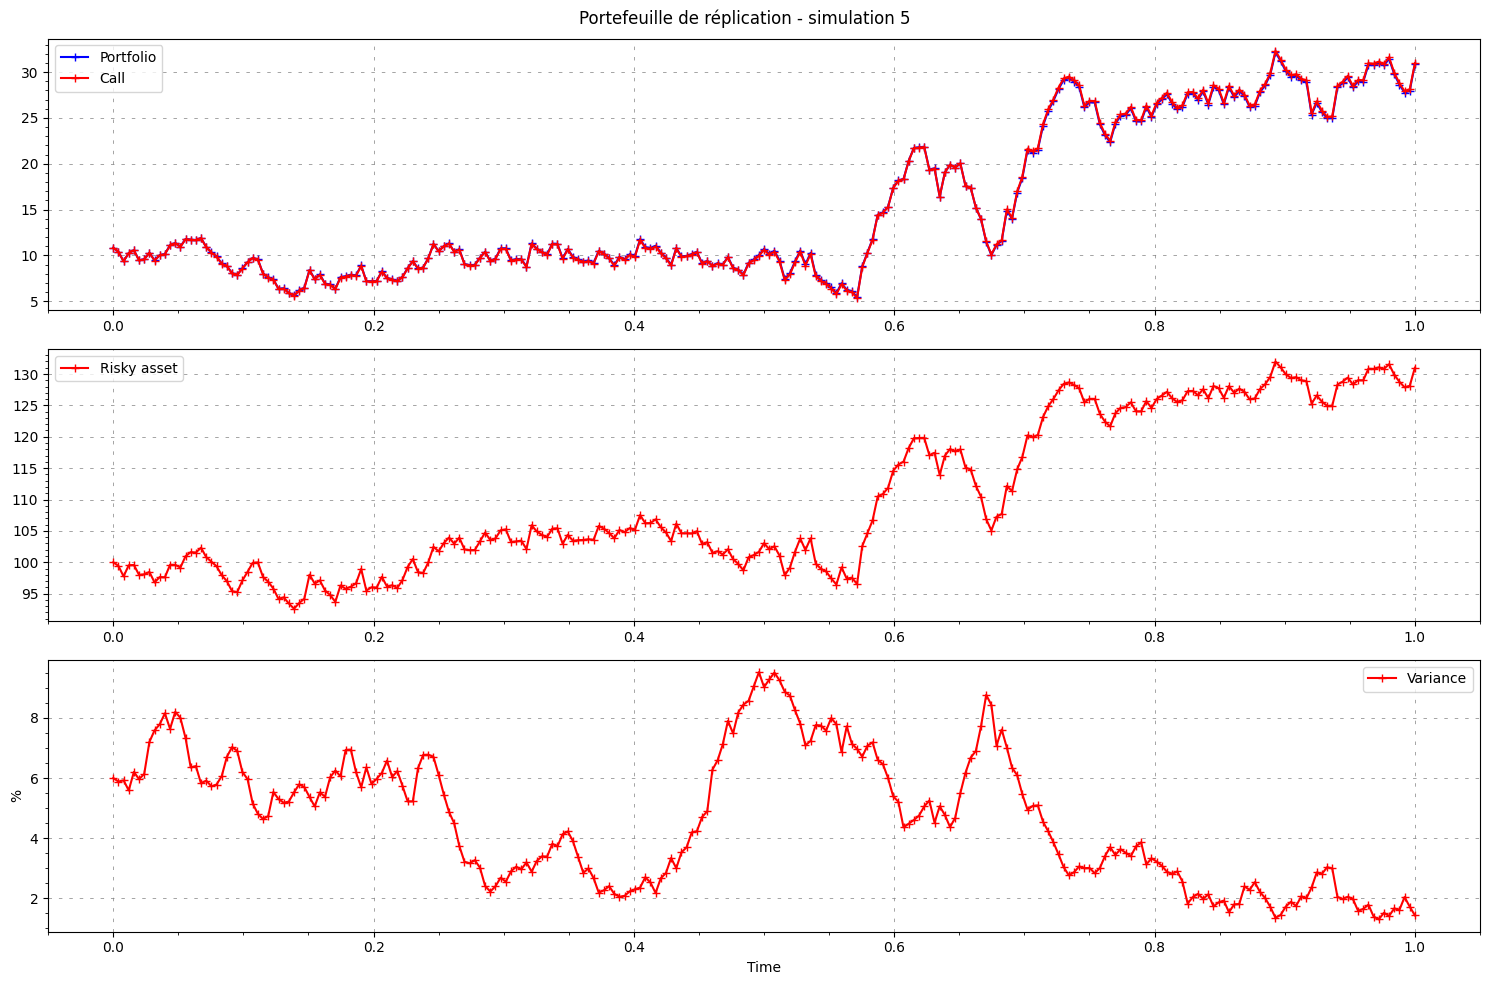

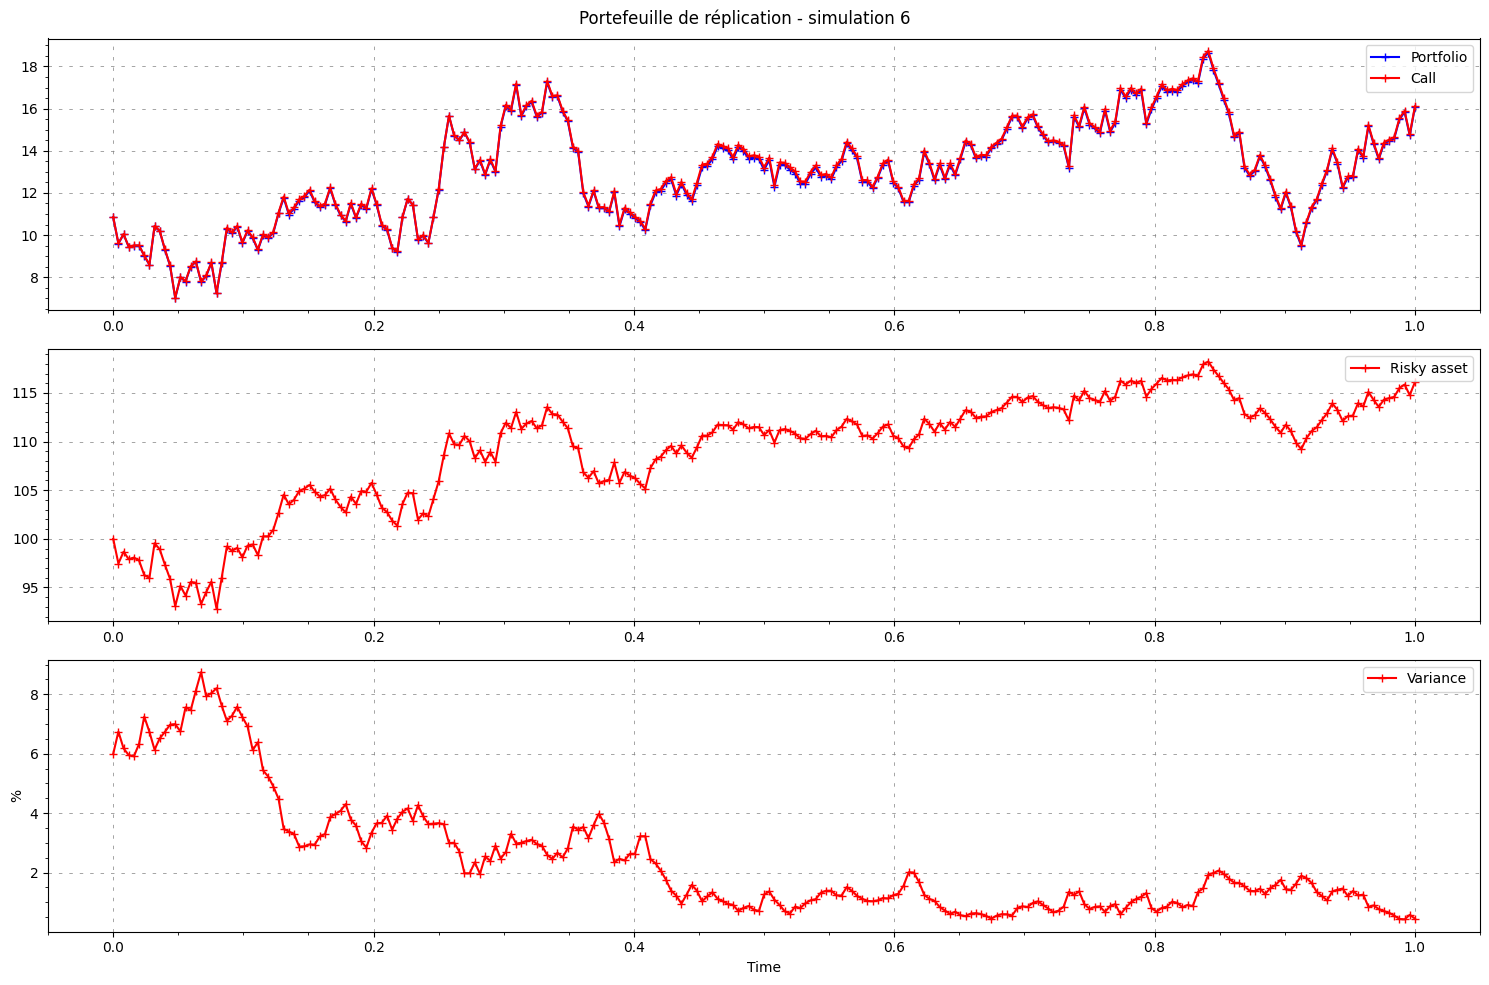

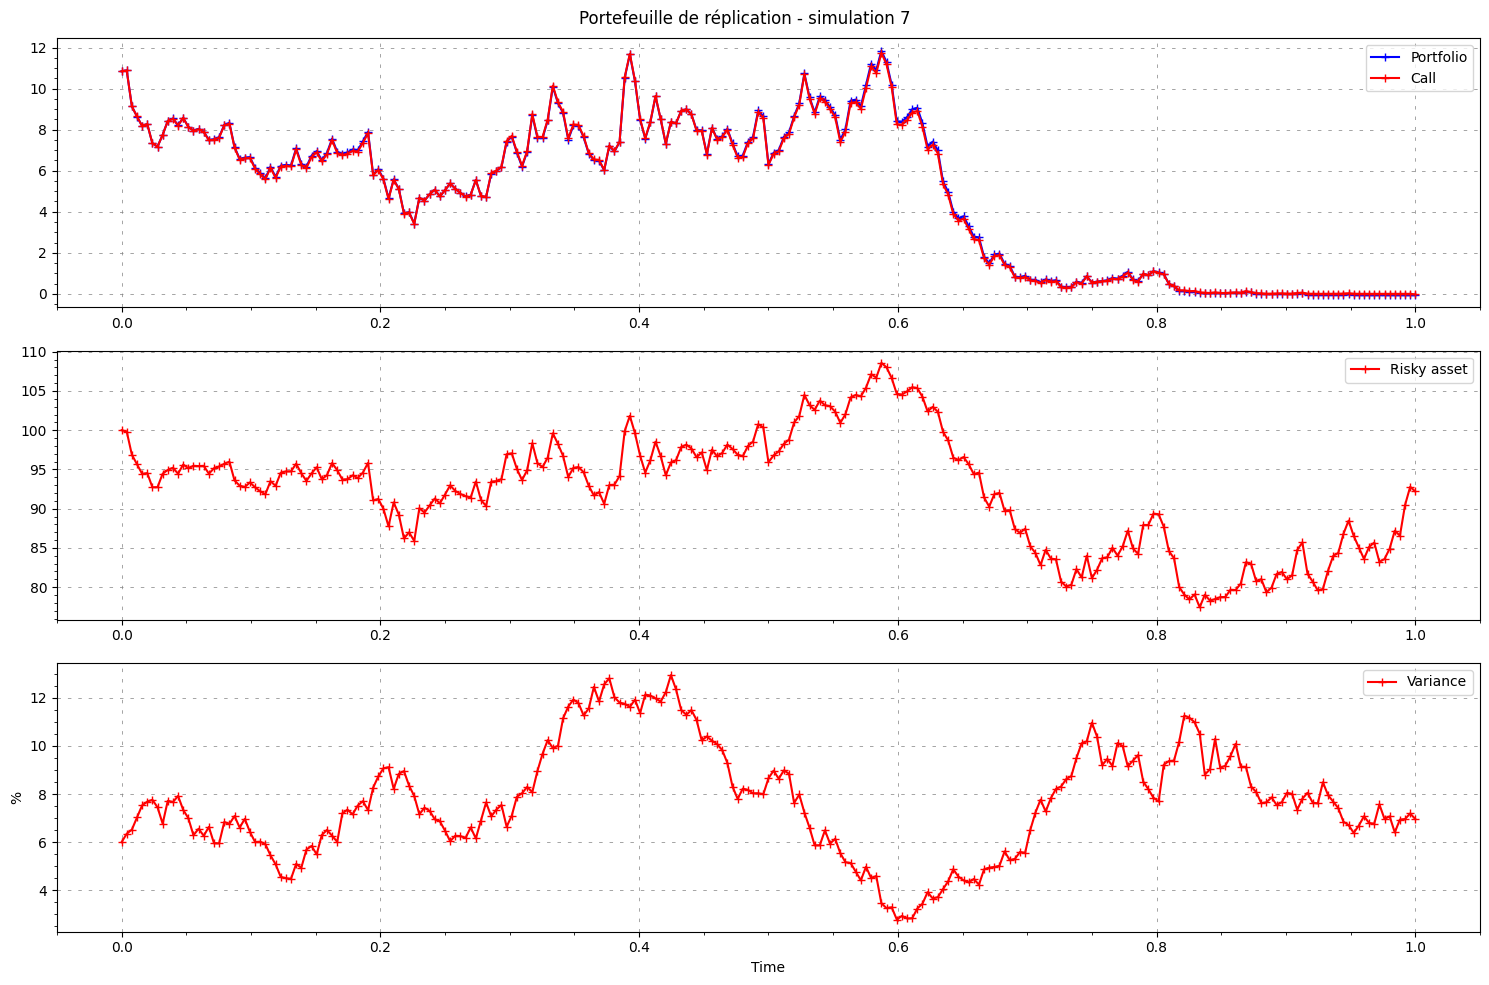

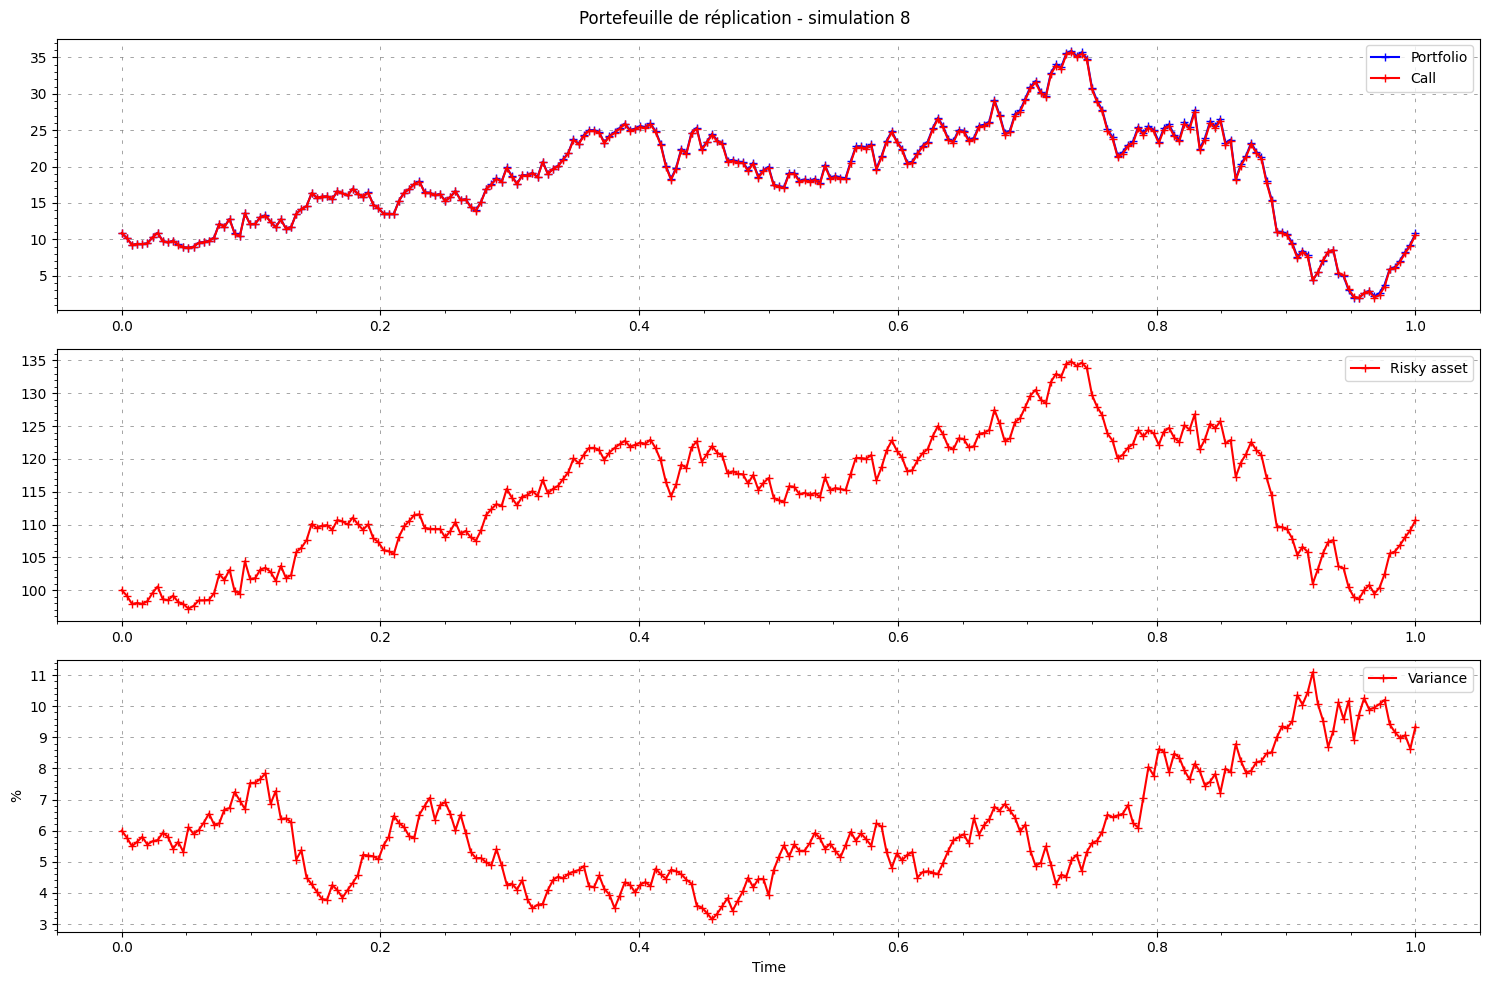

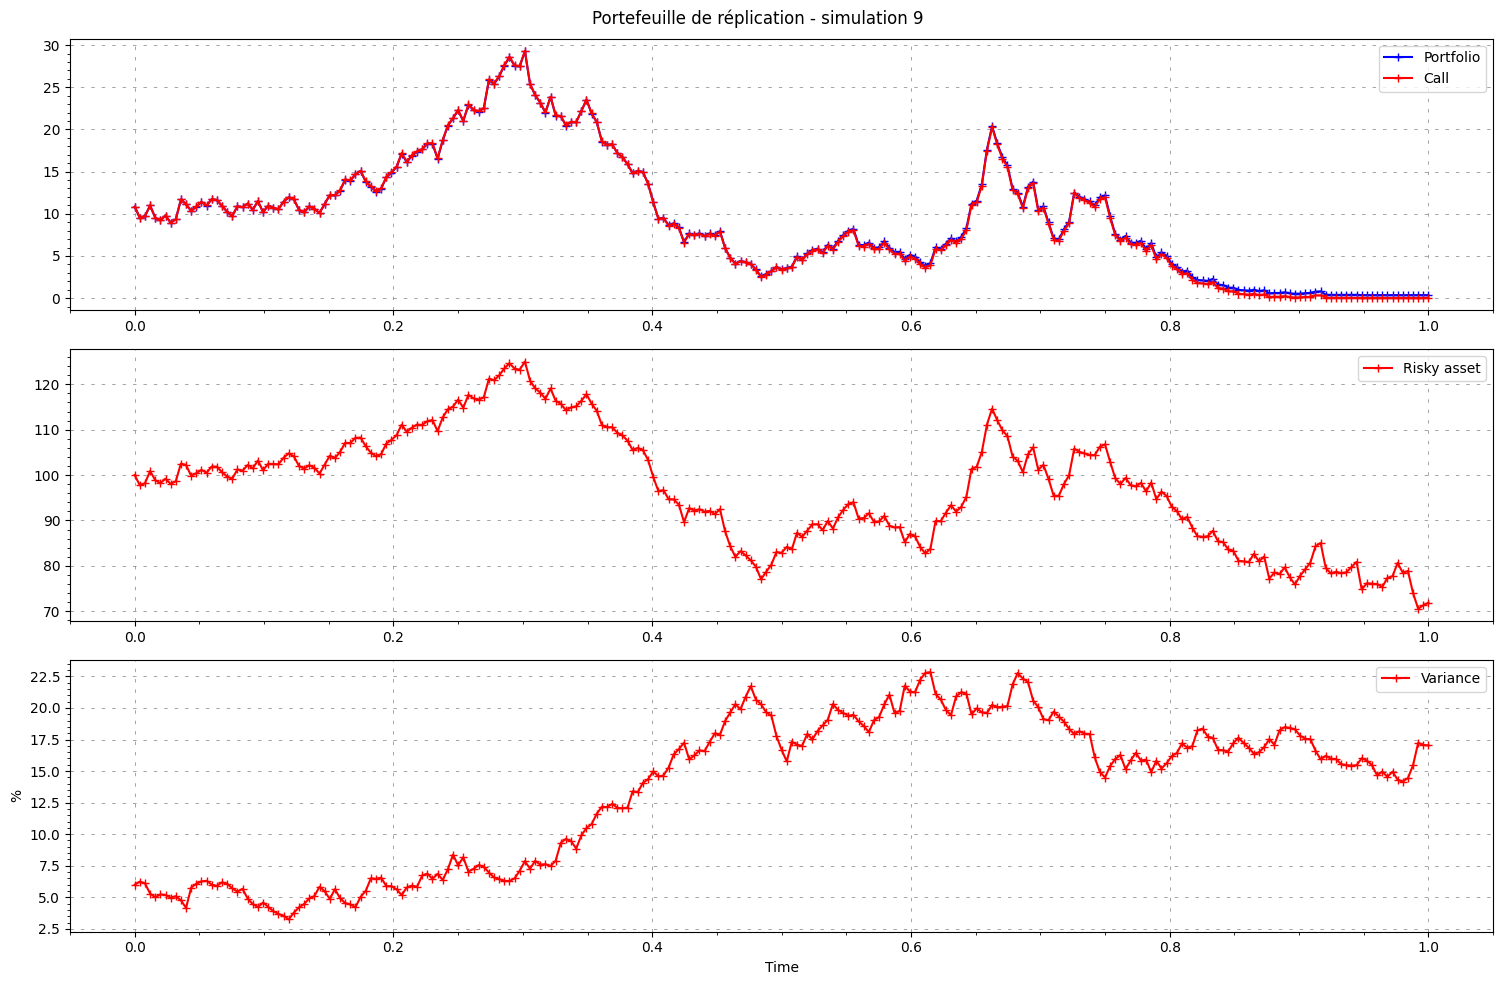

IndexError: index 10 is out of bounds for axis 0 with size 10

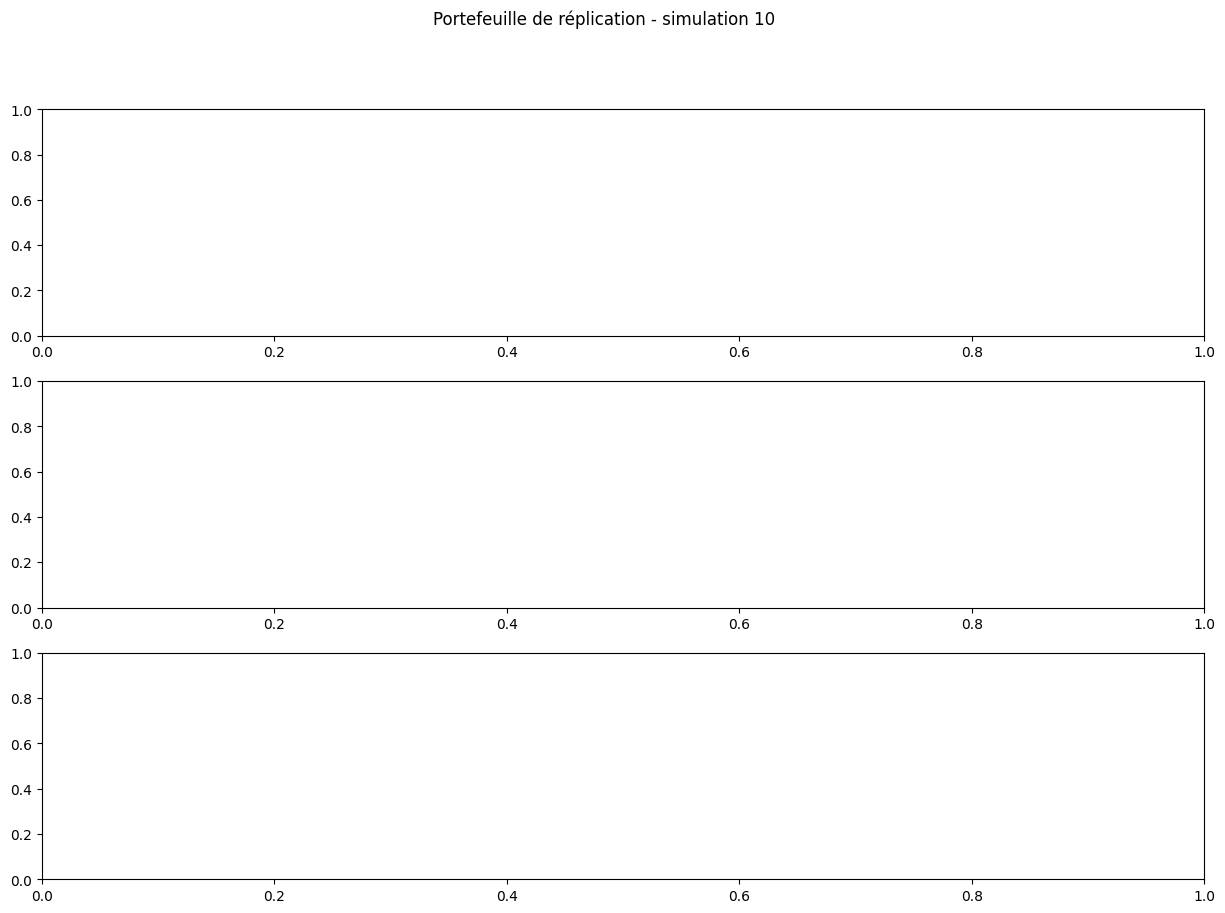

In [6]:
nbr_simulations_to_plot = 50
time = np.linspace(start=0, stop=maturity, num=nbr_points + 1)
paths = range(nbr_simulations_to_plot)

for path in paths:

    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))

    plt.suptitle(f"Portefeuille de réplication - simulation {path}")

    # Tracé avec des styles différents
    ax1.plot(time, portfolio[path, :], label="Portfolio", color='blue', marker='+')
    ax1.plot(time, C[path, :], label="Call", color='red', marker='+')
    ax1.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
    ax1.minorticks_on()
    ax1.legend()

    # Tracé avec des styles différents
    ax2.plot(time, S[path, :], label="Risky asset", color='red', marker='+')
    ax2.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
    ax2.minorticks_on()
    ax2.legend()

    # Tracé du sous-jacent et des strikes
    ax3.plot(time, V[path, :]*100, label="Variance", color='red', marker='+')
    ax3.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
    ax3.minorticks_on()
    ax3.set_xlabel("Time")
    ax3.set_ylabel("%")
    ax3.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# time = np.linspace(start=0, stop=maturity, num=nbr_points + 1)

# paths = range(nbr_simulations)

# for path in paths:

#     fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
#     plt.suptitle(f"Portefeuille de réplication - simulation {path}")

#     # Masquage des zones où S est en dessous du strike
#     C_upper = np.ma.masked_where(S[path, :] < strike, C[path, :])
#     C_lower = np.ma.masked_where(S[path, :] >= strike, C[path, :])

#     St_upper = np.ma.masked_where(S[path, :] < strike, S[path, :])
#     St_lower = np.ma.masked_where(S[path, :] >= strike, S[path, :])

#     Vt_upper = np.ma.masked_where(S[path, :] < strike, V[path, :])
#     Vt_lower = np.ma.masked_where(S[path, :] >= strike, V[path, :])

#     # Tracé avec des styles différents
#     ax1.plot(time, C_lower, label=r"Target call ($S_t < K$)", color='red', marker='+')
#     ax1.plot(time, C_upper, label=r"Target call ($S_t > K$)", color='green', marker='+')
#     ax1.plot(time, portfolio[path, :], label="Portfolio", color='blue')
#     ax1.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
#     ax1.minorticks_on()
#     ax1.legend()

#     # Tracé du sous-jacent et des strikes
#     ax2.axhline(y=strike, label="Target strike", linestyle="dashed", color='black', linewidth=0.7)
#     # ax2.plot(time, S[path, :], label="Underlying")
#     ax2.plot(time, St_lower, label=r"Underlying ($S_t < K$)", color='red', marker='+')
#     ax2.plot(time, St_upper, label=r"Underlying ($S_t > K$)", color='green', marker='+')
#     ax2.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
#     ax2.minorticks_on()
#     ax2.legend()

#     # Tracé du sous-jacent et des strikes
#     ax3.plot(time, Vt_lower*100, label=r"Target call ($S_t < K$)", color='red', marker='+')
#     ax3.plot(time, Vt_upper*100, label=r"Target call ($S_t > K$)", color='green', marker='+')
#     ax3.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
#     ax3.minorticks_on()
#     ax3.set_xlabel("Time")
#     ax3.set_ylabel("%")
#     ax3.legend()

#     plt.tight_layout()
#     plt.show()

In [ ]:
# time = np.linspace(start=0, stop=maturity, num=nbr_points + 1)

# paths = range(nbr_simulations)

# for path in paths:

#     fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
#     plt.suptitle(f"Portefeuille de réplication - simulation {path}")

#     # Masquage des zones où S est en dessous du strike
#     C_upper = np.ma.masked_where(S[path, :] < strike, C[path, :])
#     C_lower = np.ma.masked_where(S[path, :] >= strike, C[path, :])

#     St_upper = np.ma.masked_where(S[path, :] < strike, S[path, :])
#     St_lower = np.ma.masked_where(S[path, :] >= strike, S[path, :])

#     Vt_upper = np.ma.masked_where(S[path, :] < strike, V[path, :])
#     Vt_lower = np.ma.masked_where(S[path, :] >= strike, V[path, :])

#     # Tracé avec des styles différents
#     ax1.plot(time, C_lower, label=r"Target call ($S_t < K$)", color='red', marker='+')
#     ax1.plot(time, C_upper, label=r"Target call ($S_t > K$)", color='green', marker='+')
#     ax1.plot(time, portfolio[path, :], label="Portfolio", color='blue')
#     ax1.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
#     ax1.minorticks_on()
#     ax1.legend()

#     # Tracé du sous-jacent et des strikes
#     ax2.axhline(y=strike, label="Target strike", linestyle="dashed", color='black', linewidth=0.7)
#     # ax2.plot(time, S[path, :], label="Underlying")
#     ax2.plot(time, St_lower, label=r"Underlying ($S_t < K$)", color='red', marker='+')
#     ax2.plot(time, St_upper, label=r"Underlying ($S_t > K$)", color='green', marker='+')
#     ax2.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
#     ax2.minorticks_on()
#     ax2.legend()

#     # Tracé du sous-jacent et des strikes
#     ax3.plot(time, Vt_lower*100, label=r"Target call ($S_t < K$)", color='red', marker='+')
#     ax3.plot(time, Vt_upper*100, label=r"Target call ($S_t > K$)", color='green', marker='+')
#     ax3.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
#     ax3.minorticks_on()
#     ax3.set_xlabel("Time")
#     ax3.set_ylabel("%")
#     ax3.legend()

#     plt.tight_layout()
#     plt.show()